# Padronização

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_excel('pokemon_data_tratado.xlsx')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [5]:
display(df.isnull().sum())

Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [6]:
display(df.dtypes)

Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [7]:
atrib = df.drop(columns = 'Is_legendary', axis = 1)
resp = df['Is_legendary'].values

atrib

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32
1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65
1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40
1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60


In [8]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.preprocessing import StandardScaler

In [9]:
label_encoder = LabelEncoder()

for column_name in atrib:
    column_dtype = atrib[column_name].dtype
    if column_dtype == 'object':
        atrib[column_name] = label_encoder.fit_transform(atrib[column_name])

df_testinho = pd.DataFrame(atrib)
display(df_testinho)

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,91,9,13,318,45,49,49,65,65,45
1,2,427,9,13,405,60,62,63,80,80,60
2,3,959,9,13,525,80,82,83,100,100,80
3,4,118,6,6,309,39,52,43,60,50,65
4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,864,10,16,471,109,81,99,66,84,32
1031,628,82,14,7,510,110,83,70,112,70,65
1032,705,815,16,2,452,58,75,83,83,113,40
1033,706,347,16,2,600,80,100,100,110,150,60


In [10]:
#pre processador para atributos
preprocess = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('Standard', StandardScaler(), make_column_selector(dtype_include=['int']))])

In [11]:
atrib_pre = pd.DataFrame(preprocess.fit_transform(atrib), columns= preprocess.get_feature_names_out())
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-1.659316,-1.425805,-0.038963,0.791262,-0.944395,-1.023666,-0.967148,-0.833123,-0.159117,-0.170847,-0.782624
1,-1.655925,-0.301226,-0.038963,0.791262,-0.163957,-0.365813,-0.524620,-0.296687,0.345333,0.414543,-0.264843
2,-1.652535,1.479356,-0.038963,0.791262,0.912509,0.511324,0.156192,0.469650,1.017932,1.195064,0.425530
3,-1.649145,-1.335437,-0.583916,-0.625267,-1.025130,-1.286807,-0.865026,-1.063024,-0.327267,-0.756238,-0.092250
4,-1.645755,-1.332090,-0.583916,-0.625267,-0.163957,-0.453527,-0.456539,-0.488272,0.345333,-0.170847,0.425530
...,...,...,...,...,...,...,...,...,...,...,...
1030,0.432402,1.161395,0.142688,1.398347,0.428099,1.783174,0.122151,1.082720,-0.125487,0.570648,-1.231367
1031,0.466303,-1.455927,0.869293,-0.422906,0.777950,1.827031,0.190233,-0.028469,1.421492,0.024283,-0.092250
1032,0.727344,0.997394,1.232595,-1.434713,0.257659,-0.453527,-0.082092,0.469650,0.446223,1.702403,-0.955217
1033,0.730734,-0.568983,1.232595,-1.434713,1.585300,0.511324,0.768923,1.121037,1.354232,3.146367,-0.264843


In [12]:
atrib_pre = atrib_pre[atrib.columns.values]
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,-1.659316,-1.425805,-0.038963,0.791262,-0.944395,-1.023666,-0.967148,-0.833123,-0.159117,-0.170847,-0.782624
1,-1.655925,-0.301226,-0.038963,0.791262,-0.163957,-0.365813,-0.524620,-0.296687,0.345333,0.414543,-0.264843
2,-1.652535,1.479356,-0.038963,0.791262,0.912509,0.511324,0.156192,0.469650,1.017932,1.195064,0.425530
3,-1.649145,-1.335437,-0.583916,-0.625267,-1.025130,-1.286807,-0.865026,-1.063024,-0.327267,-0.756238,-0.092250
4,-1.645755,-1.332090,-0.583916,-0.625267,-0.163957,-0.453527,-0.456539,-0.488272,0.345333,-0.170847,0.425530
...,...,...,...,...,...,...,...,...,...,...,...
1030,0.432402,1.161395,0.142688,1.398347,0.428099,1.783174,0.122151,1.082720,-0.125487,0.570648,-1.231367
1031,0.466303,-1.455927,0.869293,-0.422906,0.777950,1.827031,0.190233,-0.028469,1.421492,0.024283,-0.092250
1032,0.727344,0.997394,1.232595,-1.434713,0.257659,-0.453527,-0.082092,0.469650,0.446223,1.702403,-0.955217
1033,0.730734,-0.568983,1.232595,-1.434713,1.585300,0.511324,0.768923,1.121037,1.354232,3.146367,-0.264843


In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain, xtest, ytrain, ytest = train_test_split(atrib_pre, resp, test_size = 0.25, random_state = 420)

In [15]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix

In [16]:
from sklearn.model_selection import GridSearchCV

classificador_knn = knn()

parametros = {'n_neighbors': range(1, 30)}

print(parametros)

grid = GridSearchCV(classificador_knn, parametros,cv=5)
grid.fit(xtrain, ytrain)

print(f"Melhor valor de k: {grid.best_params_}")
print(f"Melhor classificador:{grid.best_estimator_}")
print(f"Melhor score (médio):{grid.best_score_*100:.2f}%")

#criando classificador
k = 5
classificador_knn = knn(n_neighbors=k)
#classificando
classificador_knn.fit(xtrain, ytrain)

{'n_neighbors': range(1, 30)}
Melhor valor de k: {'n_neighbors': 9}
Melhor classificador:KNeighborsClassifier(n_neighbors=9)
Melhor score (médio):95.49%


KNeighborsClassifier()

<AxesSubplot: >

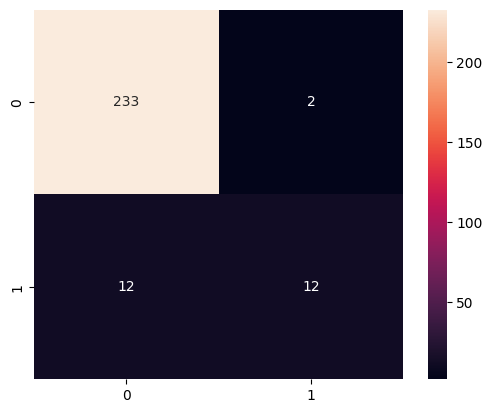

In [17]:

grid.fit(xtrain, ytrain)
y_pred =grid.predict(xtest)

matriz_confusao = confusion_matrix(ytest,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_knn.classes_, xticklabels = classificador_knn.classes_,fmt = 'd')

In [18]:
from sklearn.metrics import classification_report
classi = classification_report(ytest, y_pred)


print(classi)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       235
           1       0.86      0.50      0.63        24

    accuracy                           0.95       259
   macro avg       0.90      0.75      0.80       259
weighted avg       0.94      0.95      0.94       259



In [19]:
previsoes_knn = classificador_knn.predict(xtest)
print(previsoes_knn)

[0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]


In [20]:
from sklearn.metrics import accuracy_score

In [21]:
acc = accuracy_score(ytest, previsoes_knn)

print(f'{acc*100:.7f}% accuracy')

94.5945946% accuracy


# Normalização

In [22]:
df = pd.read_excel('pokemon_data_tratado.xlsx')
df.drop('Unnamed: 0', axis = 1, inplace = True)
df

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Is_legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,0
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,0
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32,0
1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65,0
1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40,0
1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60,0


In [23]:
display(df.isnull().sum())

Pokedex ID      0
Name            0
Type_1          0
Type_2          0
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Is_legendary    0
dtype: int64

In [24]:
display(df.dtypes)

Pokedex ID       int64
Name            object
Type_1          object
Type_2          object
Total            int64
HP               int64
Attack           int64
Defense          int64
Sp. Atk          int64
Sp. Def          int64
Speed            int64
Is_legendary     int64
dtype: object

In [25]:
atrib = df.drop(columns = 'Is_legendary', axis = 1)
resp = df['Is_legendary'].values

atrib

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80
3,4,Charmander,Fire,Fire,309,39,52,43,60,50,65
4,5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,Stunfisk Galarian Stunfisk,Ground,Steel,471,109,81,99,66,84,32
1031,628,Braviary Hisuian Braviary,Psychic,Flying,510,110,83,70,112,70,65
1032,705,Sliggoo Hisuian Sliggoo,Steel,Dragon,452,58,75,83,83,113,40
1033,706,Goodra Hisuian Goodra,Steel,Dragon,600,80,100,100,110,150,60


In [26]:
label_encoder = LabelEncoder()

for column_name in atrib:
    column_dtype = atrib[column_name].dtype
    if column_dtype == 'object':
        atrib[column_name] = label_encoder.fit_transform(atrib[column_name])

df_testinho = pd.DataFrame(atrib)
display(df_testinho)

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,91,9,13,318,45,49,49,65,65,45
1,2,427,9,13,405,60,62,63,80,80,60
2,3,959,9,13,525,80,82,83,100,100,80
3,4,118,6,6,309,39,52,43,60,50,65
4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,864,10,16,471,109,81,99,66,84,32
1031,628,82,14,7,510,110,83,70,112,70,65
1032,705,815,16,2,452,58,75,83,83,113,40
1033,706,347,16,2,600,80,100,100,110,150,60


In [27]:
from sklearn.preprocessing import MinMaxScaler

In [28]:
#pre processador para atributos
preprocess = ColumnTransformer(verbose_feature_names_out = False, remainder = 'passthrough', transformers = [('MinMaxScaler', MinMaxScaler(), make_column_selector(dtype_include=['float']))])

In [29]:
atrib_pre = pd.DataFrame(preprocess.fit_transform(atrib), columns= preprocess.get_feature_names_out())
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,91,9,13,318,45,49,49,65,65,45
1,2,427,9,13,405,60,62,63,80,80,60
2,3,959,9,13,525,80,82,83,100,100,80
3,4,118,6,6,309,39,52,43,60,50,65
4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,864,10,16,471,109,81,99,66,84,32
1031,628,82,14,7,510,110,83,70,112,70,65
1032,705,815,16,2,452,58,75,83,83,113,40
1033,706,347,16,2,600,80,100,100,110,150,60


In [30]:
atrib_pre = atrib_pre[atrib.columns.values]
atrib_pre

,Pokedex ID,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,1,91,9,13,318,45,49,49,65,65,45
1,2,427,9,13,405,60,62,63,80,80,60
2,3,959,9,13,525,80,82,83,100,100,80
3,4,118,6,6,309,39,52,43,60,50,65
4,5,119,6,6,405,58,64,58,80,65,80
...,...,...,...,...,...,...,...,...,...,...,...
1030,618,864,10,16,471,109,81,99,66,84,32
1031,628,82,14,7,510,110,83,70,112,70,65
1032,705,815,16,2,452,58,75,83,83,113,40
1033,706,347,16,2,600,80,100,100,110,150,60


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain, xtest, ytrain, ytest = train_test_split(atrib_pre, resp, test_size = 0.25, random_state = 69)

In [33]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import confusion_matrix

In [34]:
from sklearn.model_selection import GridSearchCV

classificador_knn = knn()

kvalo = {'n_neighbors': range(1, 30)}

grid = GridSearchCV(classificador_knn, parametros,cv=5)
grid.fit(xtrain, ytrain)

print(f"Melhor valor de k: {grid.best_params_}")
print(f"Melhor classificador:{grid.best_estimator_}")
print(f"Melhor score (médio):{grid.best_score_*100:.2f}%")

#criando classificador
k = 3
classificador_knn = knn(n_neighbors=k)
#classificando
classificador_knn.fit(xtrain, ytrain)

Melhor valor de k: {'n_neighbors': 3}
Melhor classificador:KNeighborsClassifier(n_neighbors=3)
Melhor score (médio):94.72%


KNeighborsClassifier(n_neighbors=3)

<AxesSubplot: >

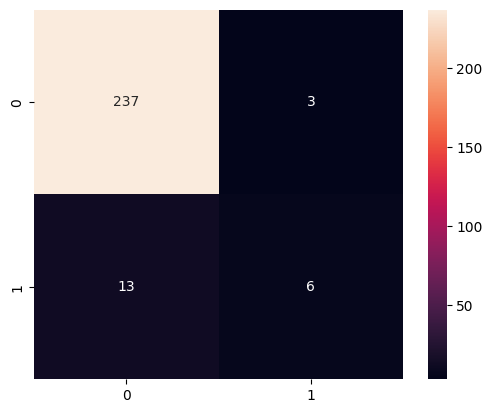

In [35]:
grid.fit(xtrain, ytrain)
y_pred =grid.predict(xtest)

matriz_confusao = confusion_matrix(ytest,y_pred)

sns.heatmap(matriz_confusao,square = True,annot = True, yticklabels = classificador_knn.classes_, xticklabels = classificador_knn.classes_,fmt = 'd')

In [36]:
from sklearn.metrics import classification_report

In [37]:
classi = classification_report(ytest, y_pred)


print(classi)

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       240
           1       0.67      0.32      0.43        19

    accuracy                           0.94       259
   macro avg       0.81      0.65      0.70       259
weighted avg       0.93      0.94      0.93       259



In [38]:
from sklearn.metrics import accuracy_score

In [39]:
acc = accuracy_score(ytest, previsoes_knn)

print(f'{acc*100:.7f}% accuracy')

87.2586873% accuracy
